**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Oluwatobiloba Ogunbi <br/> 
Student Number: 300202843

Name: Vanisha Bagga <br/>
Student Number: 300191679

- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 

We divided steps 1-7 between us since they were similar processes to Assignment 2, which we also did together. We went through eachothers work for steps 1-7 to make sure our code was correct and we understood the process. After thoroughly checking each other's work, we collaborated on steps 8 and 9 together. We analyzed the results together and from our observations we tested different values for the regularization techniques. For step 9, we discussed our conclusions of the results and typed our points up together. This way, we were both able to achieve the learning outcomes.

## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [167]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *

Loading the datasets:

In [168]:
test = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv"
train = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv"
valid = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv"

test_df = pd.read_csv(test)
train_df = pd.read_csv(train)
valid_df = pd.read_csv(valid)

print(test_df.head())
print(train_df.head())
print(valid_df.head())

   2       0  0.1     0.2     0.3     0.4     0.6     0.7     0.8  0.9  ...  \
0  1  0.1111  0.0  0.0000  0.0000  0.2222  0.1111  0.0000  0.0000  0.0  ...   
1  1  0.3750  0.0  0.0625  0.0000  0.0312  0.0312  0.0625  0.0312  0.0  ...   
2  1  0.4516  0.0  0.0000  0.0000  0.0000  0.2742  0.0000  0.0806  0.0  ...   
3  0  0.0000  0.0  0.0625  0.0312  0.0000  0.7500  0.0000  0.0000  0.0  ...   
4  2  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  ...   

    0.409   0.410   0.411  0.375.3   0.412   0.413  0.414  0.415   0.416  \
0  0.0000  0.0000  0.0000   0.0000  0.0000  1.0000    0.0    0.0  0.0000   
1  0.0312  0.0312  0.0312   0.0312  0.0000  0.0625    0.0    0.0  0.0000   
2  0.0000  0.0000  0.0000   0.0000  0.0000  0.0000    0.0    0.0  0.0161   
3  0.0938  0.0000  0.1562   0.1250  0.0000  0.0312    0.0    0.0  0.0000   
4  0.1333  0.1333  0.1333   0.0000  0.0667  0.0667    0.0    0.0  0.0000   

   0.417  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[

### Data Pre-Processing
____________________________________
2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.
____________________________________

In [169]:
from sklearn.utils import shuffle

# shuffling rows
test_df = shuffle(test_df)
train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

____________________________________
3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.
____________________________________

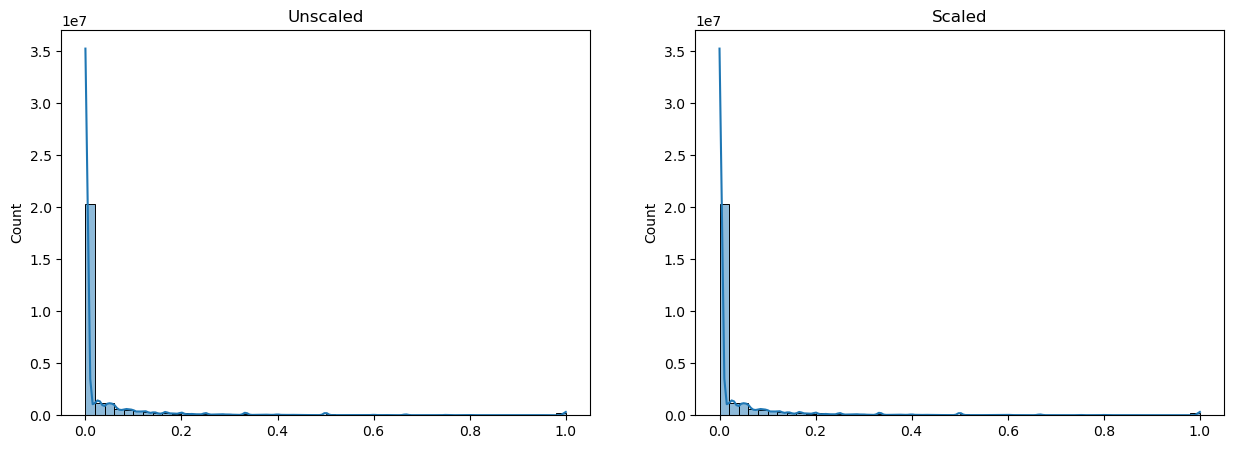

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# scaling the train data
train_scaled = train_df.copy()

train_scaled.iloc[:, 1:] = scaler.fit_transform(train_scaled.iloc[:, 1:])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
unscaled = train_df.iloc[:, 1:].values.flatten()
scaled = train_scaled.iloc[:, 1:].values.flatten()
sns.histplot(unscaled, ax=ax[0], bins=50, kde=True)
ax[0].set_title('Unscaled')
sns.histplot(scaled, ax=ax[1], bins=50, kde=True)
ax[1].set_title('Scaled')

plt.show()


<h3 style="color: #33E6FF;">Observations</h3>

By looking at both bar graphs, we can see that MinMaxScaler did not change the data, so scaling is not necessary for this data. As mentioned, all 462 features are proportions represented as values between 0 and 1 so scaling might not be needed. So, our scaling and results in the graph confirm this.

____________________________________
4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.
____________________________________

In [171]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_validation = valid_df.iloc[:, 1:].values
y_validation = valid_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

### Model Development & Evaluation
____________________________________
5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Basline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.
____________________________________

In [172]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
from keras import Sequential
from keras import layers

# dummy model 
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_validation)

# baseline (logistic reg)
base = LogisticRegression(max_iter=1000)
base.fit(X_train, y_train)
base_pred = base.predict(X_validation)

# neural network
neural = Sequential()
neural.add(layers.Dense(462, input_dim=462, activation='relu'))
neural.add(layers.Dense(8, activation='relu'))
neural.add(layers.Dense(3, activation='softmax'))

neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
neural.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

neural_pred = neural.predict(X_validation)

neural.summary()



Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6320 - loss: 0.8232 - val_accuracy: 0.6857 - val_loss: 0.7400
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7289 - loss: 0.6562 - val_accuracy: 0.7067 - val_loss: 0.7001
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7747 - loss: 0.5507 - val_accuracy: 0.7083 - val_loss: 0.7050
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8311 - loss: 0.4312 - val_accuracy: 0.6955 - val_loss: 0.7677
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8867 - loss: 0.3057 - val_accuracy: 0.6902 - val_loss: 0.8749
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9280 - loss: 0.2060 - val_accuracy: 0.6828 - val_loss: 1.0451
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9521 - loss: 0.1415 - val_accuracy: 0.6668 - val_loss: 1.2661
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.1000 - val_accurac

Model: "sequential_363"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1187 (Dense)              │ (None, 462)            │       213,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1188 (Dense)              │ (None, 8)              │         3,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1189 (Dense)              │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,913 (2.49 MB)

 Trainable params: 217,637 (850.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 435,276 (1.66 MB)

____________________________________
6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.
____________________________________

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# cross-validation of baseline
# f1 = cross_val_score(base, X_train, y_train, cv=5, scoring='f1_micro')
# accuracy = cross_val_score(base, X_train, y_train, cv=5, scoring='accuracy')
# prec = cross_val_score(base, X_train, y_train, cv=5, scoring='precision_micro')
# rec = cross_val_score(base, X_train, y_train, cv=5, scoring='recall_micro')

# print("Precision:", precision_score(y_validation, base_pred, average='weighted'))
# print("Recall:", recall_score(y_validation, base_pred, average='weighted'))
# print("F1 Score:", f1_score(y_validation, base_pred, average='weighted'))

# print("Baseline Model Cross-Validation:")
# print("F1 Score: ", f1)
# print("Accuracy: ", accuracy)
# print("Precision: ", prec)
# print("Recall: ", rec)

#classification report of baseline model (lin regression)
labels = ['H', 'E', 'C']

print(classification_report(y_validation, base_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2490
           1       0.66      0.46      0.54      1808
           2       0.67      0.76      0.72      3110

    accuracy                           0.67      7408
   macro avg       0.67      0.64      0.65      7408
weighted avg       0.67      0.67      0.67      7408



    - **Training neural networks can be time-consuming.** Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.

    - Assess the models using metrics such as precision, recall, and F1-score.

### Hyperparameter Optimization
____________________________________
7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.
____________________________________

In [175]:
from sklearn.model_selection import GridSearchCV

# parameter grids - we used a grid search strategy 
lrp = {
    'penalty': ['l2'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# scoring metrics
scoring = {
    'f1': make_scorer(f1_score, average= 'weighted'),
    'precision': make_scorer(precision_score, average= 'weighted'),
    'recall': make_scorer(recall_score, average= 'weighted')
}

lr_grid = GridSearchCV(base, lrp, cv=5, scoring=scoring, refit='f1')
lr_grid.fit(X_train, y_train)

results = {}

# extracting grid results
lr_results = pd.DataFrame(lr_grid.cv_results_)

# using max_iter and tol for comparison when plotting
hyperparams = lr_results[['param_max_iter', 'param_tol']]

# best parameters
best = lr_grid.best_params_
print("Best Parameters: ", best)
print("Best f1 score: ", lr_grid.best_score_)  

# plotting the comparisons with barplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 1)
# sns.barplot(x='param_max_iter', y='mean_test_f1', data=lr_results)
# plt.title('F1 Score vs Max Iterations')
# plt.subplot(1, 3, 2)
# sns.barplot(x='param_tol', y='mean_test_f1', data=lr_results)
# plt.title('F1 Score vs Tolerance')
# plt.show()





Best Parameters:  {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Best f1 score:  0.6833353296325788


____________________________________
8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**. 

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**. **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?
____________________________________

In [176]:
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

# plot loss and accuracy
def plot_loss_accuracy(history, title):
    epochs = range(len(history.history['loss']))
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training') # training data graph
    plt.plot(epochs, history.history['val_loss'], label='Validation') # validation data graph
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training') # training data graph
    plt.plot(epochs, history.history['val_accuracy'], label='Validation') # validation data graph
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


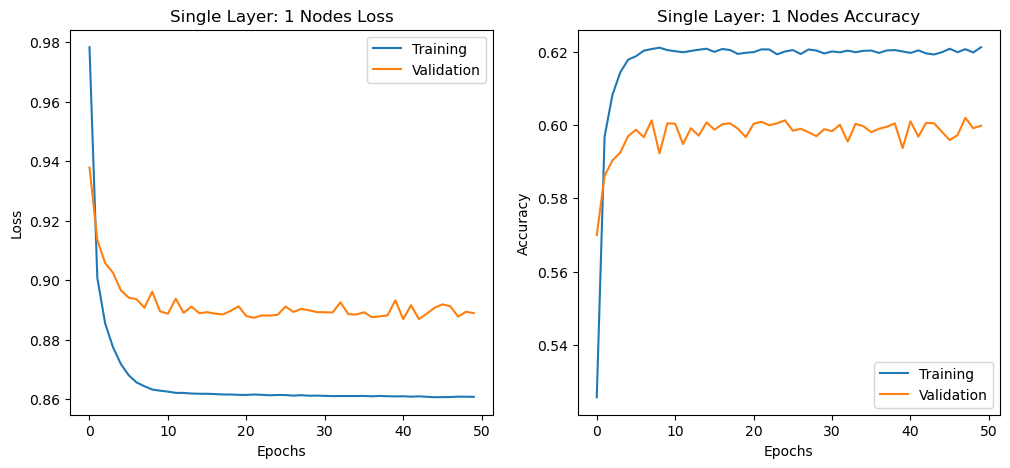

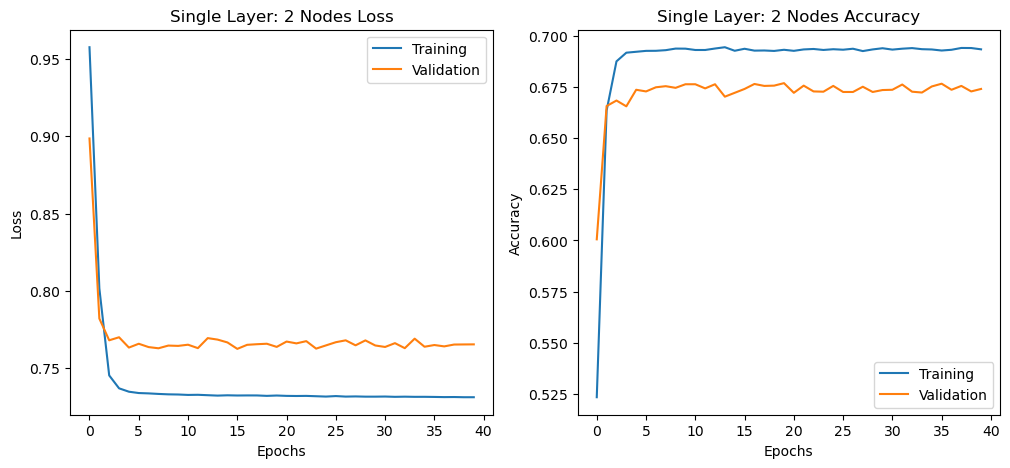

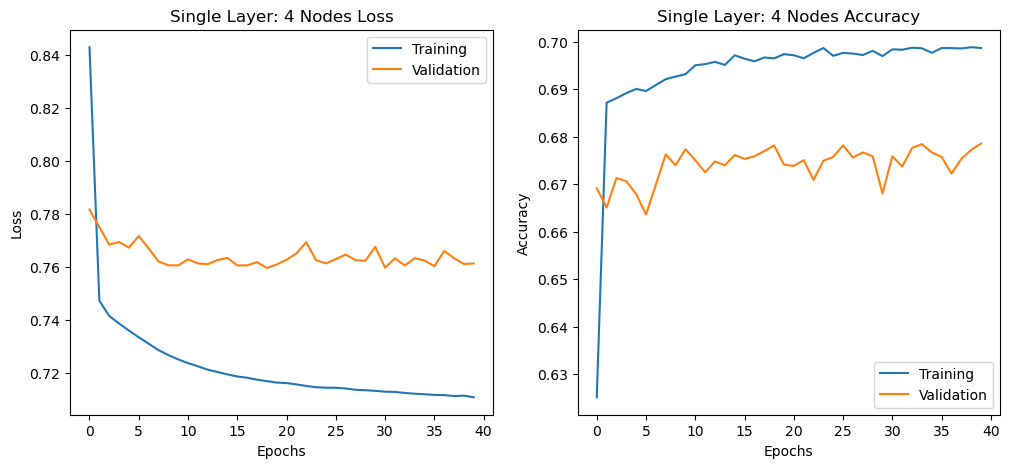

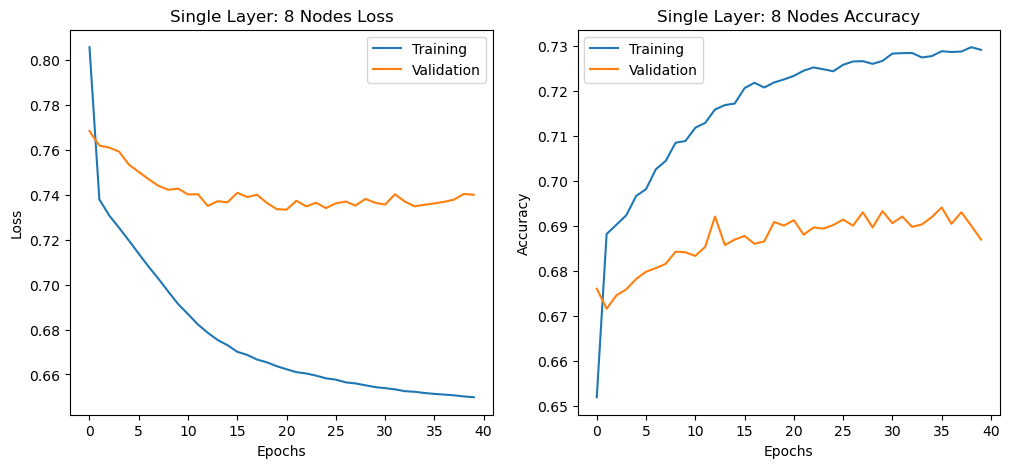

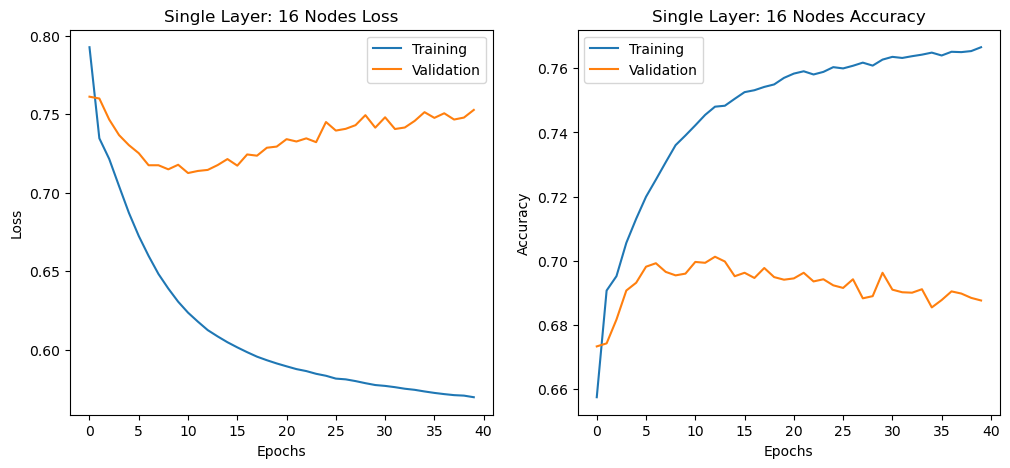

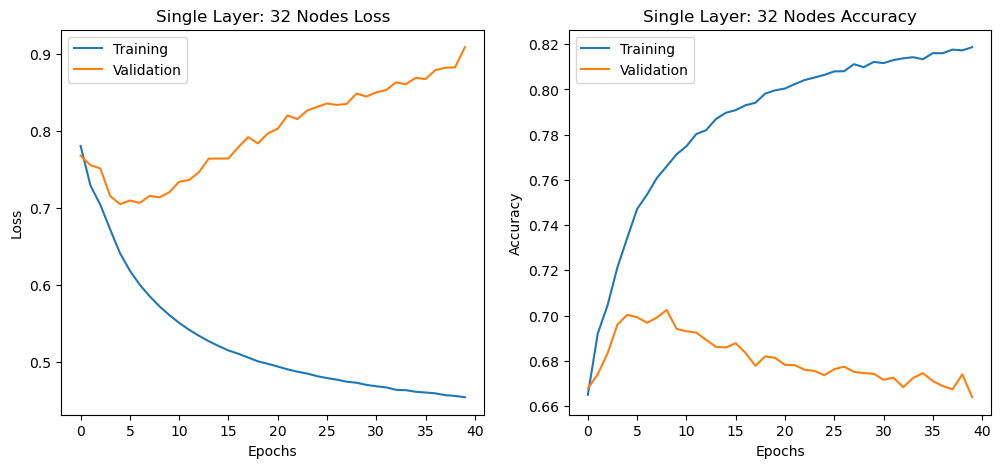

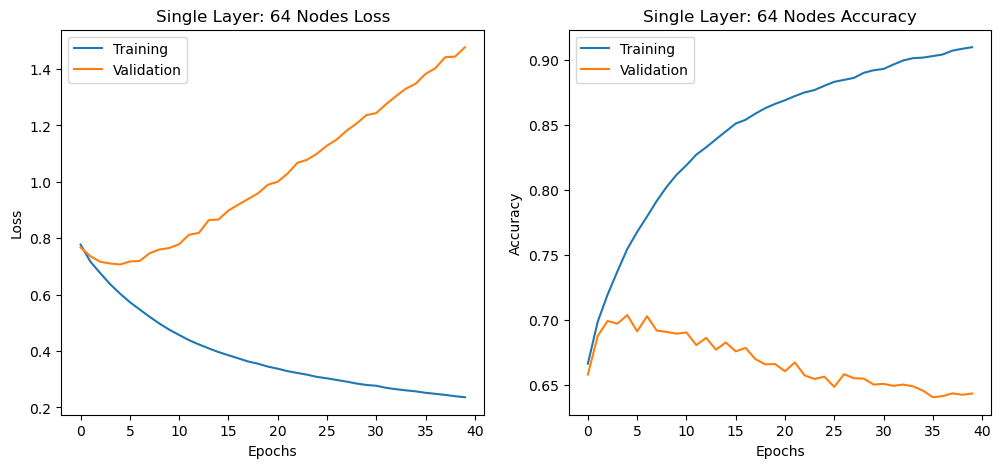

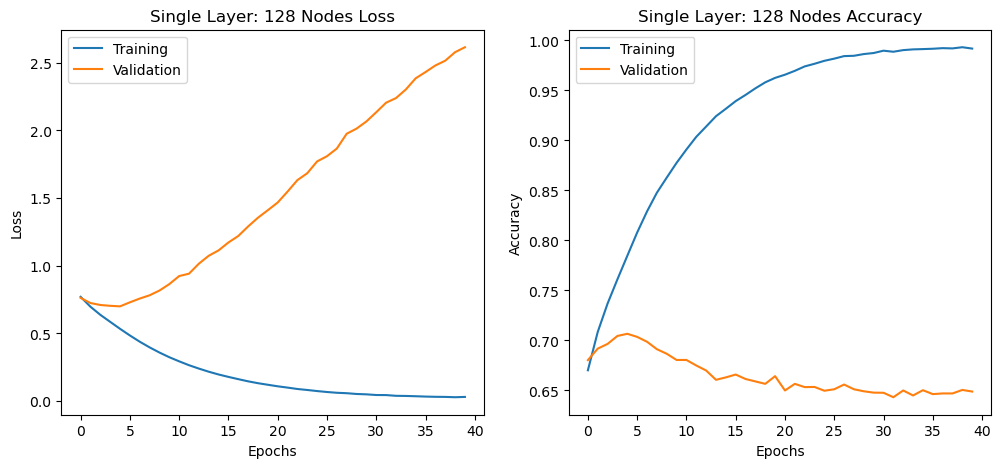

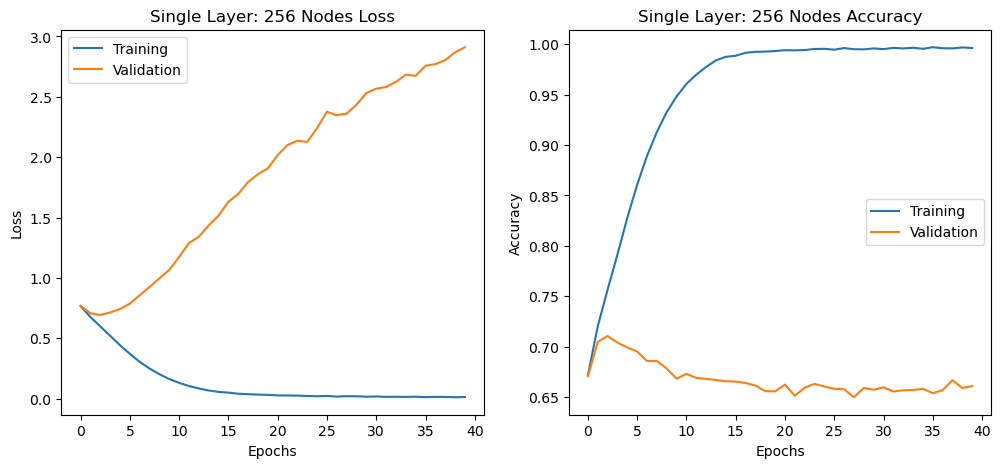

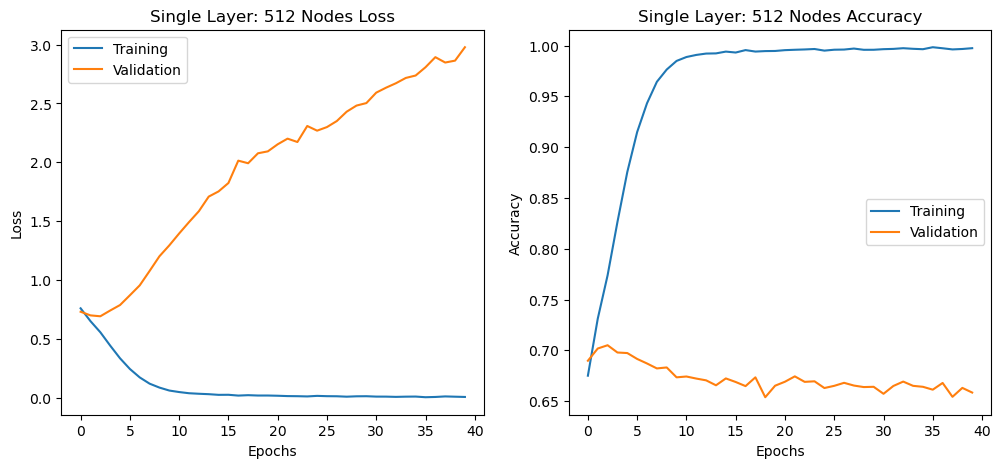

In [177]:
# different # of nodes to test in single layer
number_of_nodes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for n in number_of_nodes:
    neural = Sequential([
        layers.Dense(n, input_dim=462, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    
    if n == 1:
        e = 50 # set epoch as 50 for first test (1 node)
    else:
        e = 40 # after testing different values, chose epochs as 40. After 40 the validation data performance plateaus and then decreases.
    neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = neural.fit(X_train, y_train, epochs=e, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
    
    plot_loss_accuracy(history, f'Single Layer: {n} Nodes')

<h3 style="color: #33E6FF;">Observations</h3>

*<h5 style="color: #C583FC;">Single Layer and 1 Node in Hidden Layer</h5>*

The network seems to be underfitting. Although there is a gap between the training and validation data in both graphs for loss and accuracy, many other characteristics point to underfitting.

**Loss**
- The training and validation losses plateau at high values (around 0.8)
- The model has not learned enough from the data to improve significantly

**Accuracy**
- The training and validation accuracies are low (0.62 to training and 0.6 for validation)
- Not having a high accuracy on training data is a sign of underfitting

This means the model is too simple to caputre underlying patterns in the data. So, there is low accuracy for both training and validation data sets.

This can maybe be fixed by having higher epochs (50 to 80), and adding more neurons.

*<h5 style="color: #C583FC;">Single Layer and Multiple Nodes in Hidden Layer</h5>*

As the nodes increase, the model starts to be less smooth for (2, 4, and 8 nodes) for the validation data. Furthermore, we can see as the nodes increase even more that the model starts to increasingly overfit.

**Loss**
- Up to 64 nodes, the training loss keeps decreasing which means the model is learning and fitting well to the training data. But, the validation loss plateaus early and is higher than the training loss. This gap between both means that the model is not generalizing well to the unseen data, which means that is is memorizing the training data
- When the nodes are higher than 64, the training data loss also plateaus once it hits 0, but continues to increase for validation data. This furthermore shows that the model is not generalizing well to the unseen data and is memorizing the training data, leading to high overfitting.

**Accuracy**
- Up to 64 nodes, the training accuracy continues to increase which means the model is getting better at predicting the training data. However, the validation accuracy plateaus around a lower value than the training accuracy and continues to fluctate. So, the performance on the validation data is not improving creating a huge gap between both lines in the graph. All these points show overfitting.
- When the nodes are higher than 64, the training accuracy plateaus once it hits 1, but still plateaus at a low value for the validation accuracy. This also creates a large gap between both lines and also shows that the model is very accurate for the training data since it has memorized it very well, so it's not being accurate for data outside of the training data. This leads to high overfitting.

*<h5 style="color: #C583FC;">Number of Epochs</h5>*

The number of epochs set is determined by setting it to be until the point that the validation data performance for both loss and accuracy stops improving or before it starts getting worse. For the single node in the hidden layer, testing with 50 epochs showed that the validation data plateaus way before 50 epochs. 10-15 epochs would be better for this model. After testing with different numbers, 40 epochs was set for higher node numbers. With the single layer models that had a lot of nodes, the validation data does still start to perform worse before 40 epochs, but other testing will be used to improve the validation data performance.


____________________________________
    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.
____________________________________

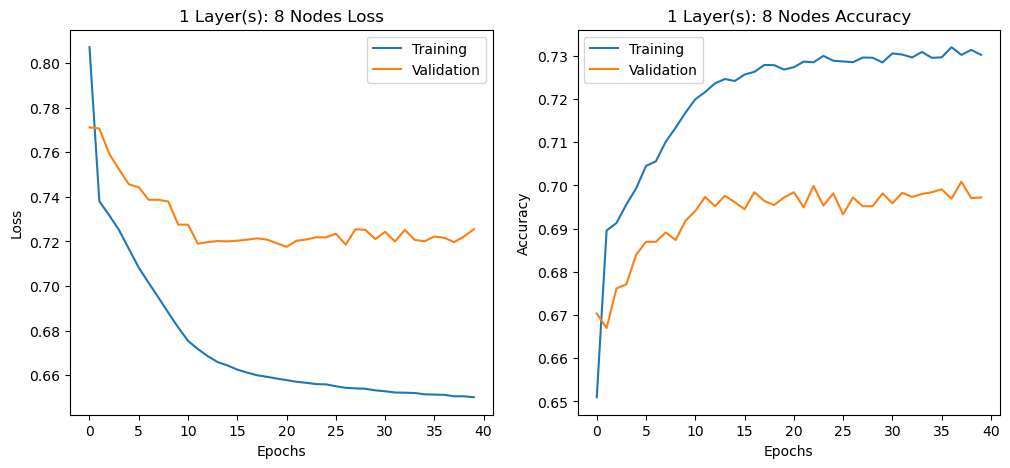

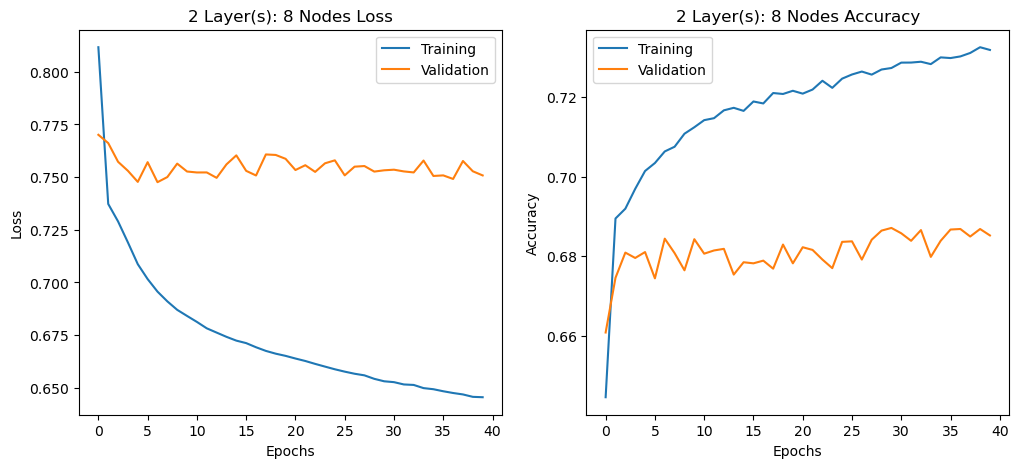

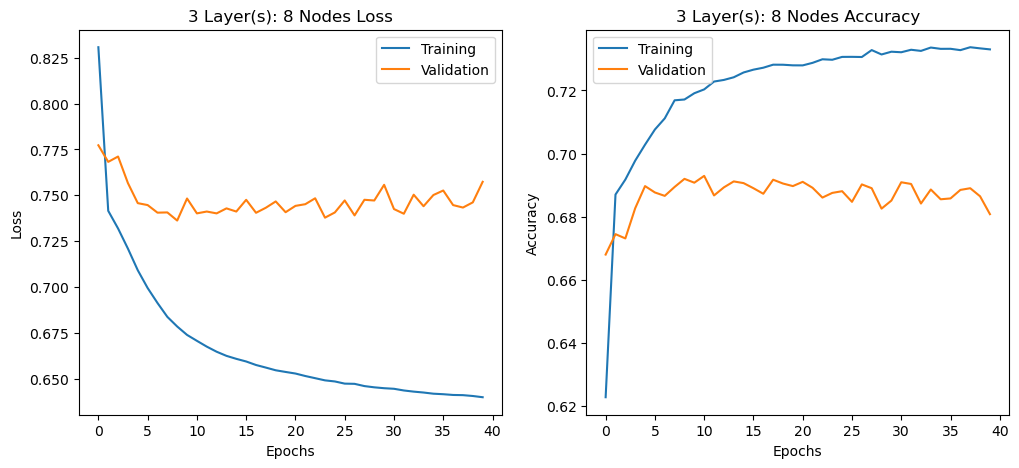

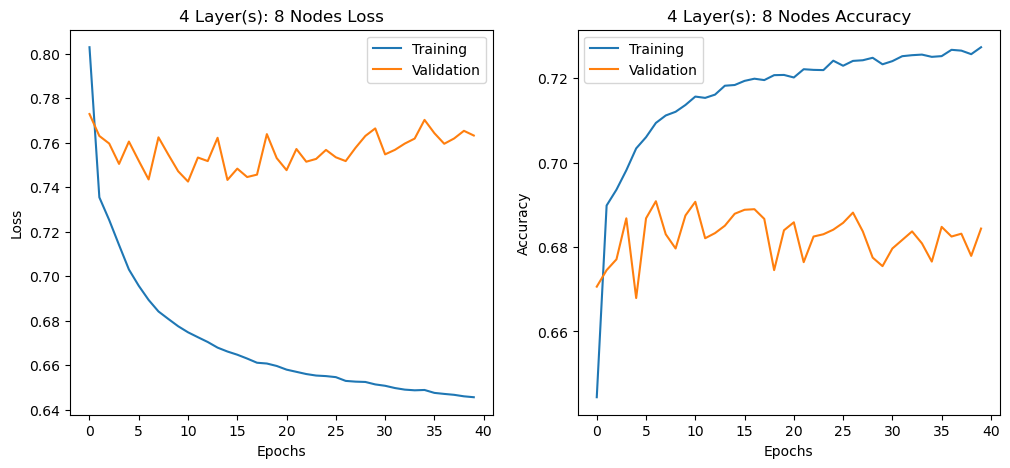

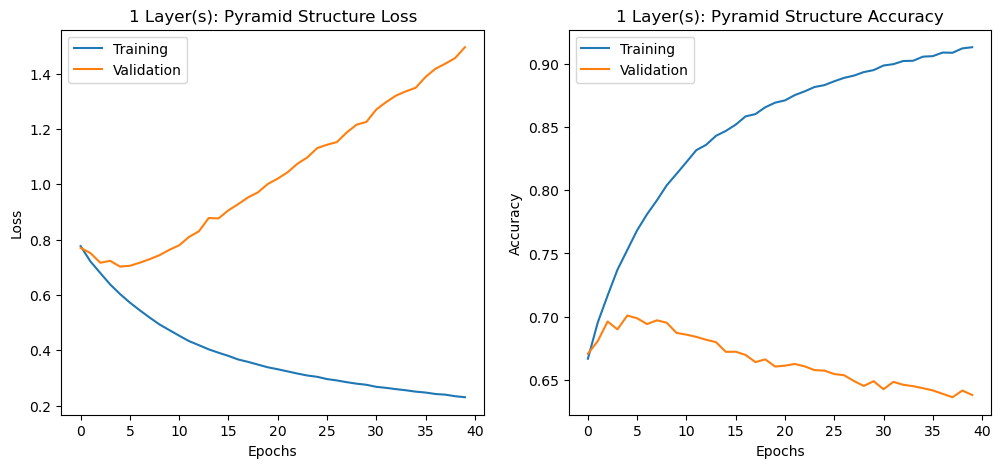

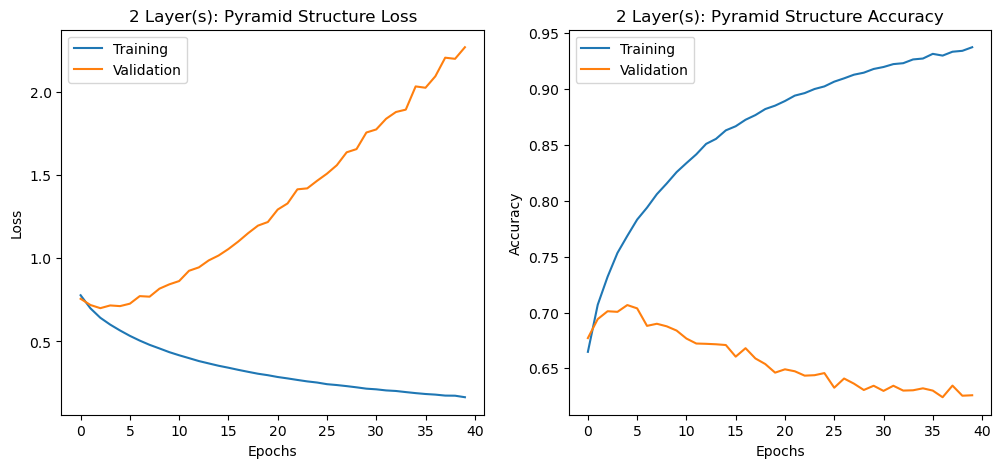

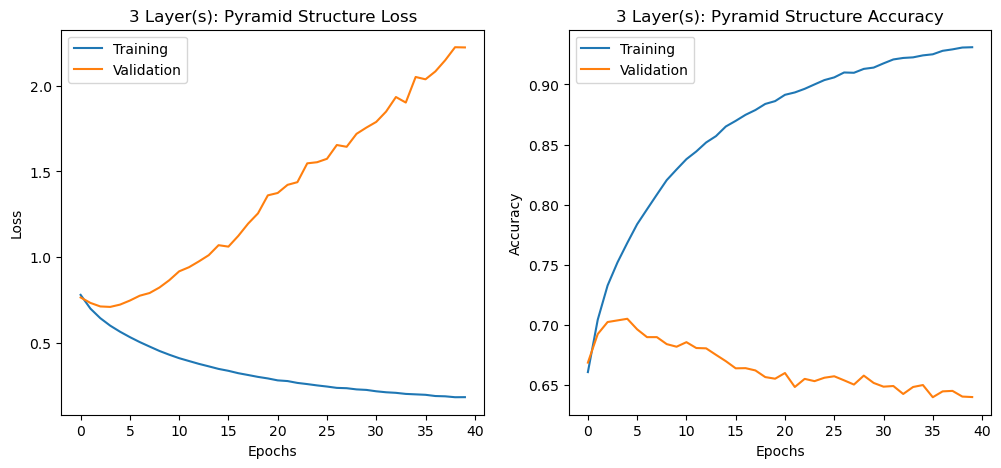

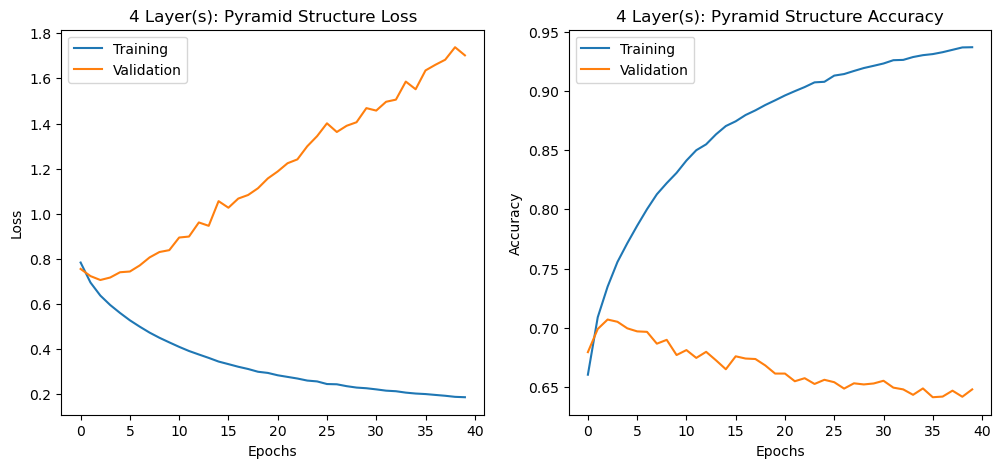

In [178]:
node_test = {
    "8 Nodes": [8, 8, 8, 8],  # same node, chose 8 from previous testing
    "Pyramid Structure": [64, 32, 16, 8] # pyramid structure, node values halfing
}

for key, value in node_test.items():
    for num_layer in range(1, 5):  # 1 to 4 layers
        neural = Sequential()

        for i in range(num_layer):
            if i == 0:
                neural.add(layers.Dense(value[i], activation='relu', input_dim=462)) # first layer values
            else:
                neural.add(layers.Dense(value[i], activation='relu'))
        neural.add(layers.Dense(3, activation='softmax'))

        neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = neural.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
        
        plot_loss_accuracy(history, f'{num_layer} Layer(s): {key}')

<h3 style="color: #33E6FF;">Observations</h3>

*<h5 style="color: #C583FC;">Number of Nodes for Each Layer</h5>*

Having a constant number of nodes (8) across all layers performed much better than halving the number of nodes for each layer. When testing with the pyramid-like structure, the validation data performs worse since the model is overfitting.

*<h5 style="color: #C583FC;">Number of Layers</h5>*

Having too many layers showed that the model started to overfit. The validation data plateuas quickly. However, if we compare the results for one layer vs two layers, there is less loss and more accuracy on the validation data with more than one layer.

*<h5 style="color: #C583FC;">Overfitting example - 4 Layer(s): Pyramid Structure</h5>*

The loss and accuracy graphs for the model with 4 layers and pyramid structure for the nodes clearly shows overfitting. The loss on the training data is close to 0 and the accuracy on the training data is close to 100%. However, the validation loss continues to increase and the validation accuracy continues to decrease. This creates a huge gap between the validation and training graphs which is the first hint of overfitting. However, the model performance on the validation data getting worse confirms the model overfitting. The model has memorized the training data patterns too closely which leads to not performing well on unseen data.


____________________________________
    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.
____________________________________

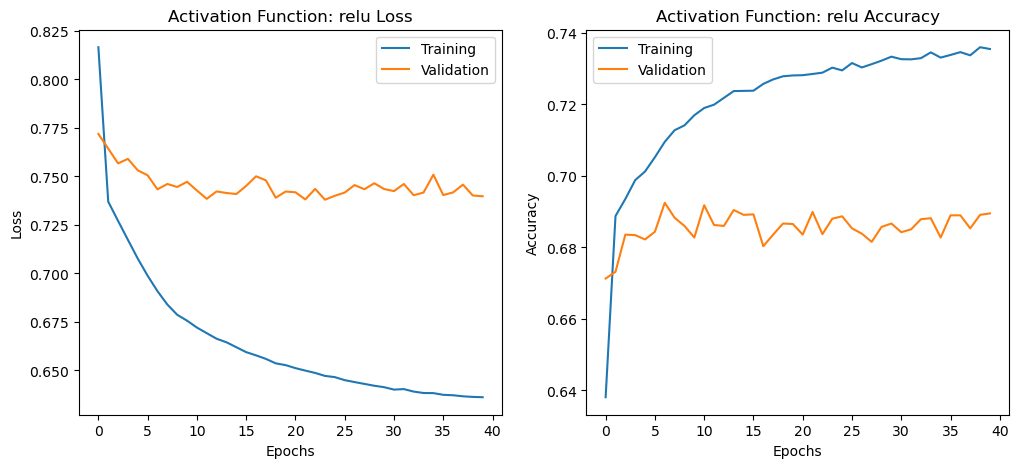

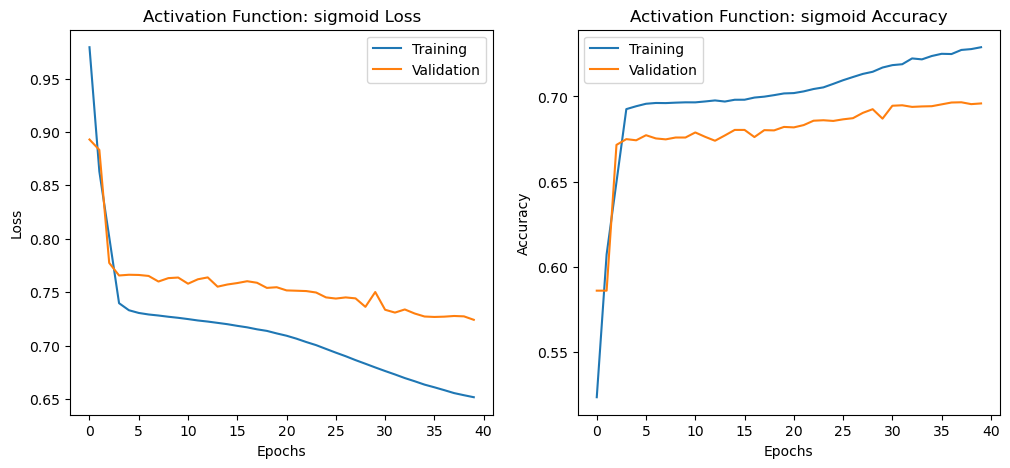

In [179]:
activations = ['relu', 'sigmoid']
for a in activations:
    # activation function is set for each layer
    neural_activation = Sequential([
        layers.Dense(8, input_dim=462, activation=a), 
        layers.Dense(8, activation=a),
        layers.Dense(8, activation=a),
        layers.Dense(3, activation='softmax')
    ])
    
    neural_activation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = neural_activation.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
    
    plot_loss_accuracy(history, f'Activation Function: {a}')

<h3 style="color: #33E6FF;">Observations</h3>

With sigmoid activation, there is less overfitting since both the validation graph and the training graph have less of a gap between eachother. Also, with relu activation the validation graph plateaus quite quickly.

____________________________________
    - **Regularization** in neural networks is a technique used to prevent overfitting.

        - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.
____________________________________

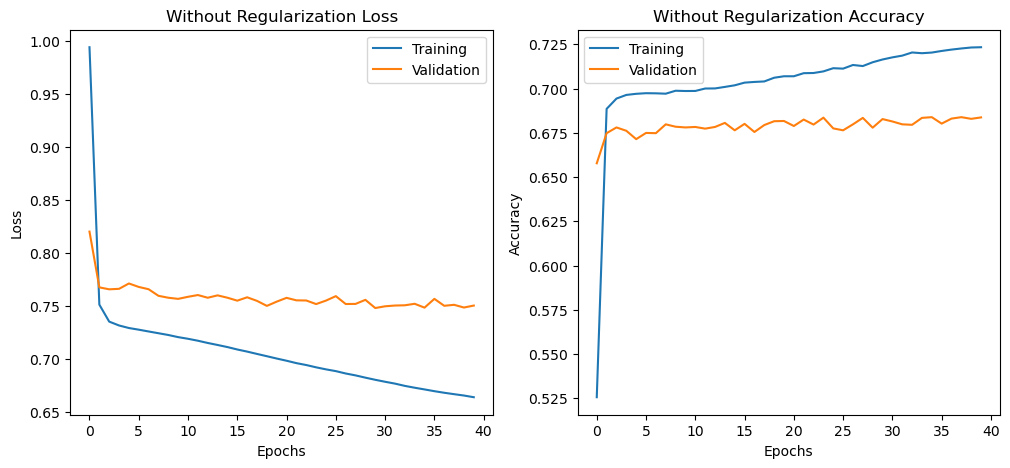

In [180]:
from keras import layers, regularizers

# model without regularization (want to compare to models with regularization)
neural_no_reg = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid'),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
])
neural_no_reg.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_no_reg = neural_no_reg.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
plot_loss_accuracy(history_no_reg, 'Without Regularization')

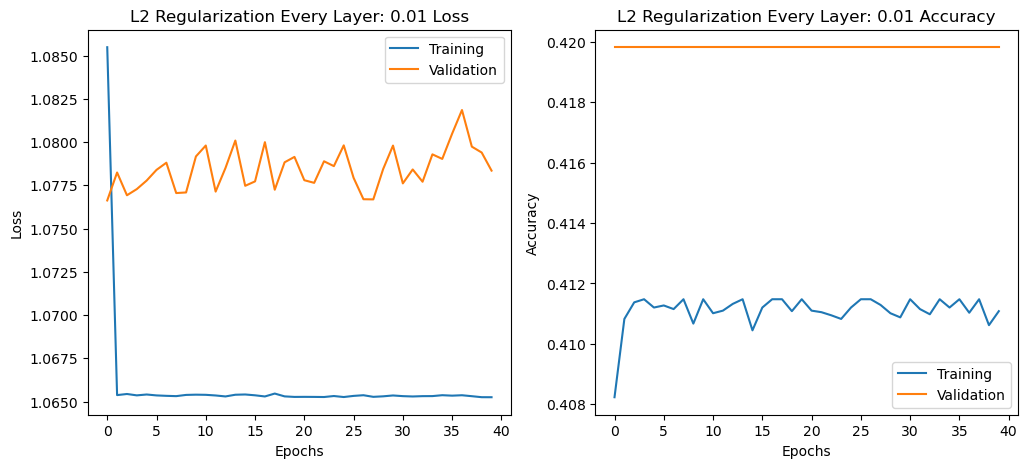

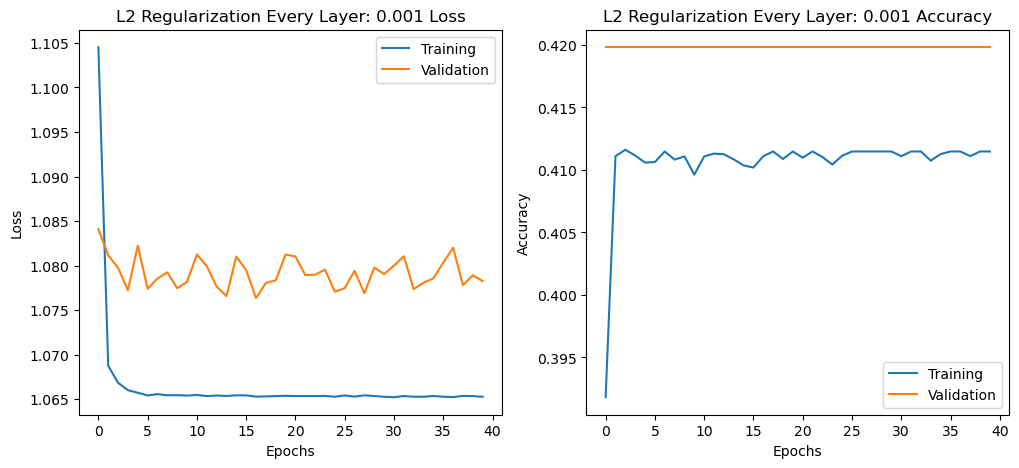

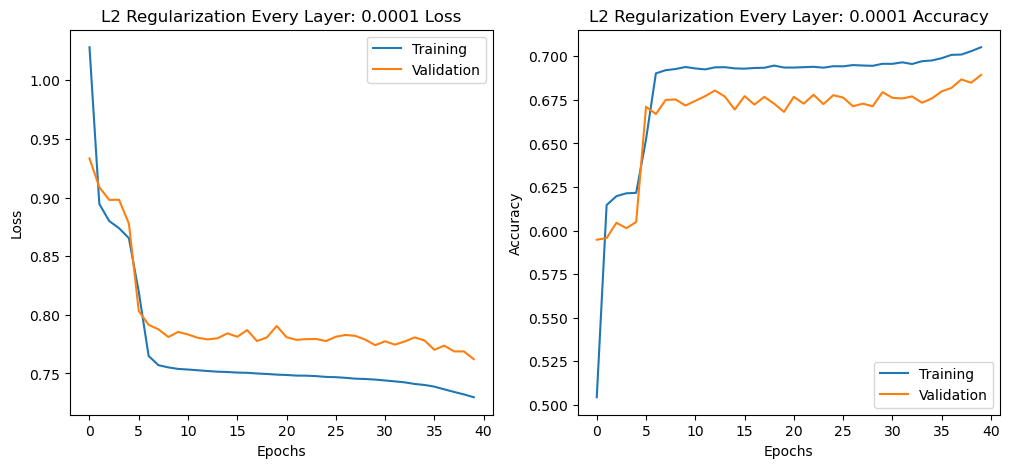

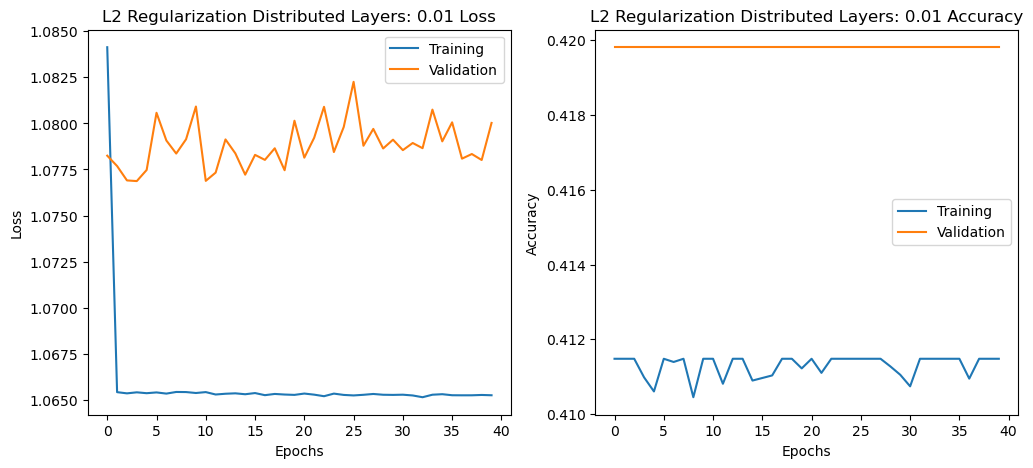

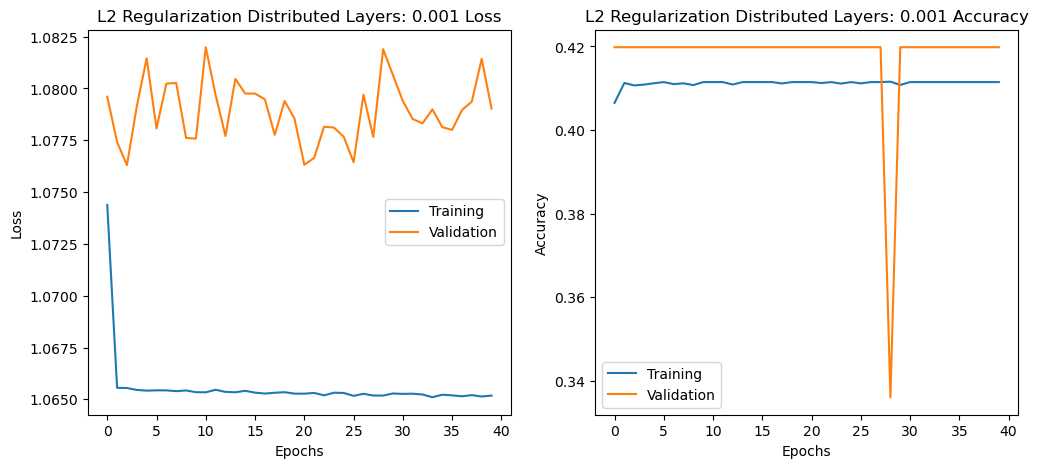

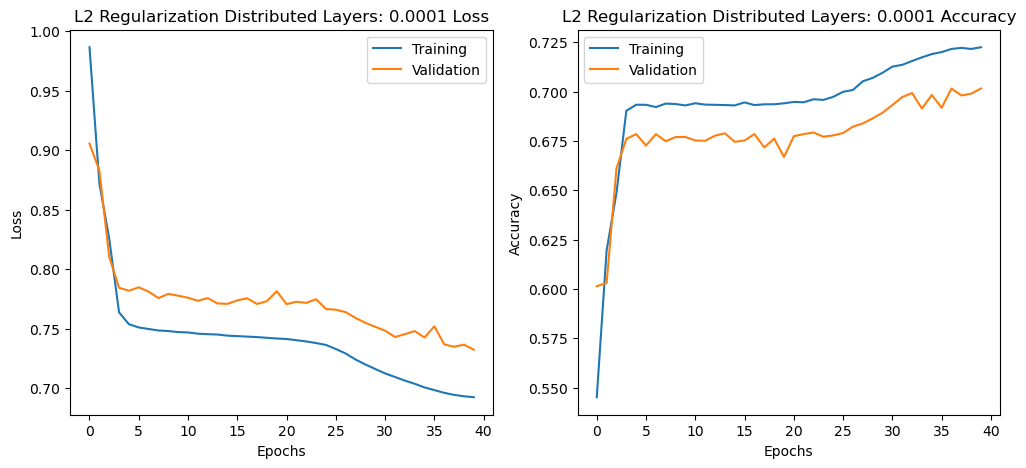

In [181]:
values = [0.01, 0.001, 1e-4]
for l2 in values:
    # model uses regularizers for every layer
    neural_every_layer = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(3, activation='softmax')
    ])
    
    neural_every_layer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = neural_every_layer.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
    
    plot_loss_accuracy(history, f"L2 Regularization Every Layer: {l2}")

for l2 in values:
    # model has regularizers distributed so not every layer has it
    neural_distributed_layer = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
    ])
    
    neural_distributed_layer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = neural_distributed_layer.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
    
    plot_loss_accuracy(history, f"L2 Regularization Distributed Layers: {l2}")

<h3 style="color: #33E6FF;">Observations</h3>

We tested both having regularization on every layer vs having it on some layers, as well as the different l2 values. 

*<h5 style="color: #C583FC;">l2 values</h5>*

- The smaller the l2 value, the better results. With a higher l2 value, the graph is not smooth and plateaus very quickly

*<h5 style="color: #C583FC;">distributed layer regularization vs every layer regularization</h5>*

- In every layer regularization model, l2 = 0.0001 continues to improve for both validation and training data. 
- In distributed layer regularization model, l2 = 0.0001 continues to improve for both validation and training data. 

So, l2 = 0.0001 and having not every layer regularized reduced overfitting the best as gave the best accuracy and loss.

*<h5 style="color: #C583FC;">Overfitting fix</h5>*

The results show that regularization for some l2 values did reduce overfitting. After regularization, the accuracy and loss for the validation data is much closer to the training accuracy and loss which means that the model is performing better to unseen data. Visually, the graphs for the training and validation data are closer together, so the gap between both graphs is reduced.

____________________________________
        - Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.
____________________________________

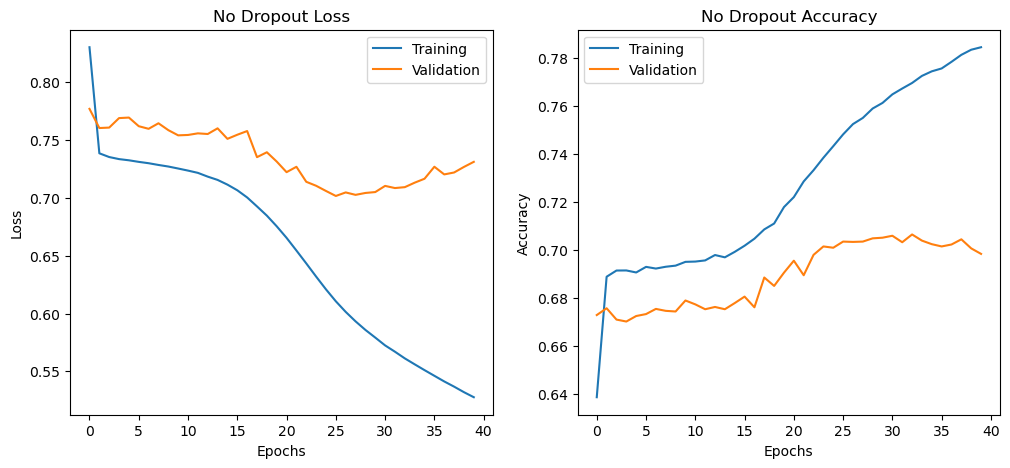

In [182]:
# model without dropout layer (want to compare to models with dropout layer)
neural_no_dropout = Sequential([
    layers.Dense(32, input_dim=462, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

neural_no_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = neural_no_dropout.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)

plot_loss_accuracy(history, 'No Dropout')

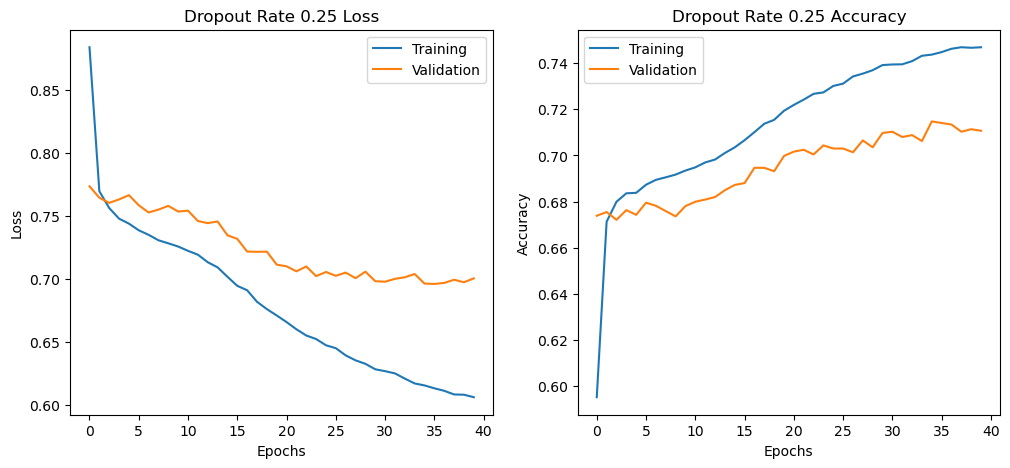

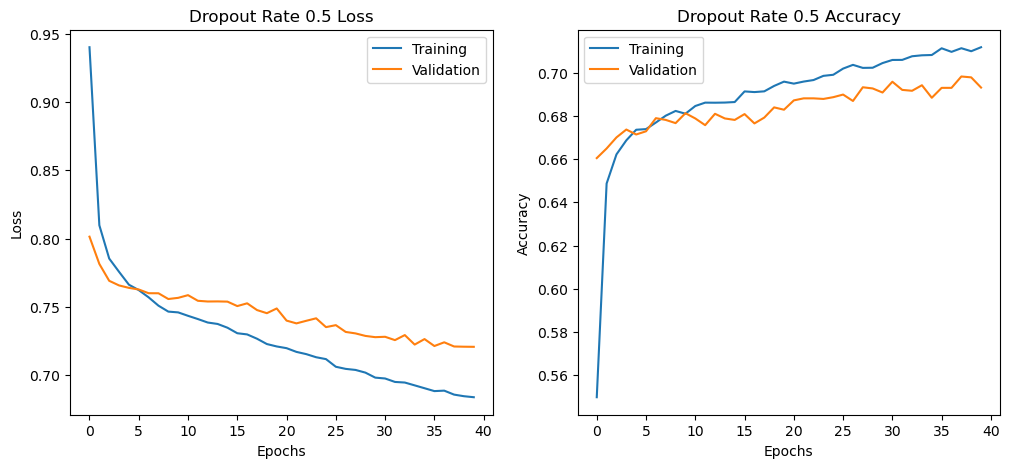

In [183]:
dropout_rates = [0.25, 0.5]
for d in dropout_rates:
    # adding dropout layer to model
    neural_dropout = Sequential([
        layers.Dense(32, input_dim=462, activation='sigmoid'),
        layers.Dropout(d),
        layers.Dense(32, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
    ])
    
    neural_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = neural_dropout.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)
    
    plot_loss_accuracy(history, f'Dropout Rate {d}')

<h3 style="color: #33E6FF;">Observations</h3>

It is very clear in the graphs that having the dropout rate reduces overfitting to the original model. Additionally, having the higher dropout rate (0.5) improves the overfitting much more than having the lower dropout rate (0.25). The gap between both validation and training graphs is reduced. Also, the validation data plateaus instead of performing worse (increasing loss and decreasing accuracy) which still occurs in the graphs with dropout rate of 0.25.

____________________________________
        - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).
____________________________________

In [184]:
def plot_experiment_accuracy_histories(histories, labels):
    plt.figure(figsize=(10, 6))
    
    for history, label in zip(histories, labels): # pair of history with labels for line graphs
        epochs = range(len(history.history['accuracy'])) # range of epochs is based on length of accuracy data in  history
        plt.plot(epochs, history.history['val_accuracy'], linestyle='--', label=f'{label} (Validation)') # dashed lines are validation
        plt.plot(epochs, history.history['accuracy'], linestyle='-', label=f'{label} (Training)') # solid lines are training, inspired by link in references (3)
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Summarizing Accuracy Results')
    plt.legend()
    plt.show()

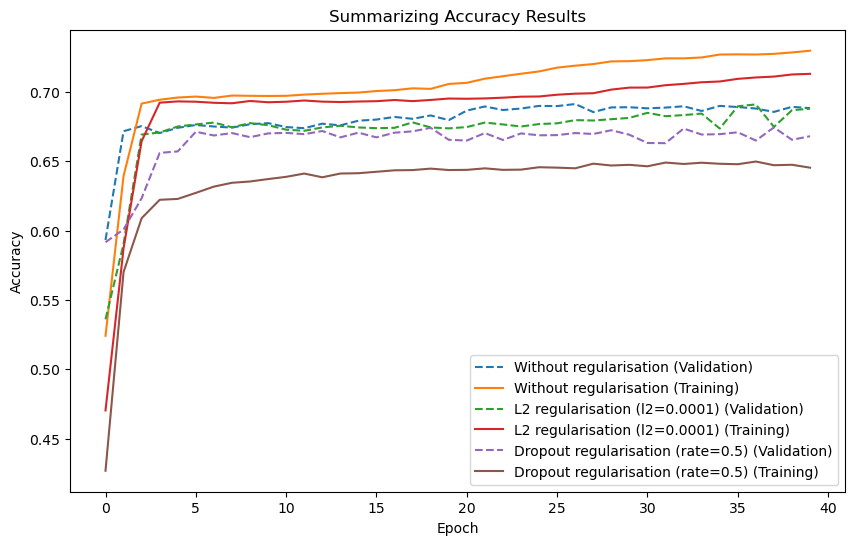

In [185]:
# model without regularization
neural_no_reg = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid'),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
])
neural_no_reg.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_no_reg = neural_no_reg.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)

# model with regularization
neural_l2 = Sequential([
    layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
    layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

neural_l2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l2 = neural_l2.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)

# model with dropout layer
neural_dropout = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
    ])
    
neural_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout = neural_dropout.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0)

   
plot_experiment_accuracy_histories(
    histories=[history_no_reg, history_l2, history_dropout],
    labels=['Without regularisation', 'L2 regularisation (l2=0.0001)', 'Dropout regularisation (rate=0.5)']
)

____________________________________
        - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?
____________________________________

*<h5 style="color: #C583FC;">Best configuration chosen</h5>*

The dropout layer technique was removed from the model. With testing with the other multiple regularization techniques we observed that it worsened performance, likely due to the regularization techniques being used. We chose to keep l2 and remove the dropout value since the l2 regularization improved the performance more by reducing overfitting better.

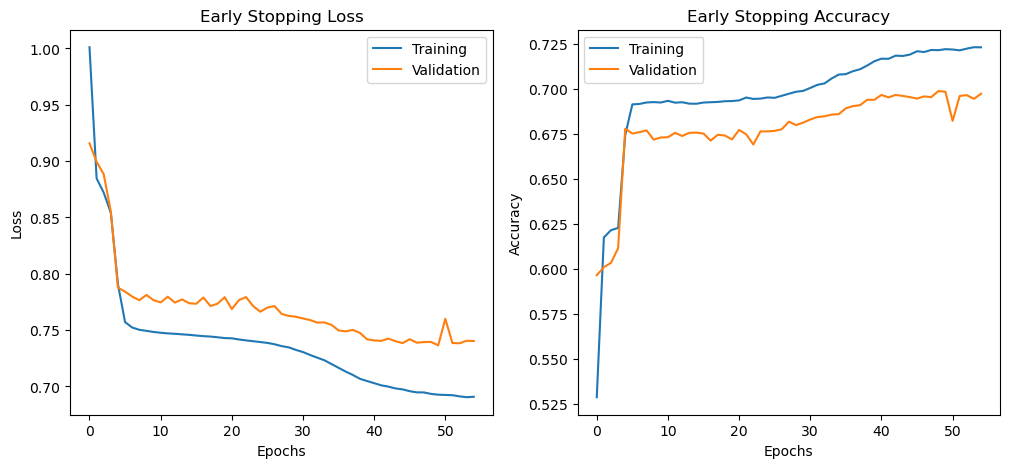

In [186]:
from keras import callbacks
callback = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

l2 = 1e-4

neural_early_stopping = Sequential([
    layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
    layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

neural_early_stopping.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = neural_early_stopping.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), batch_size=32, verbose=0, callbacks=[callback])
# epochs set to 100 with early stopping to see where it will be stopped with early stopping

plot_loss_accuracy(history, 'Early Stopping')

<h3 style="color: #33E6FF;">Observations</h3>

We did early stopping witha patience of 5 epochs. This means that the training will continue for up to 5 extra epochs after the last seen improvements in validation loss. If there are no further improvements, training will stop.

The training stopped at around 49 epochs. This means that the model achieved optimal performance at this amount of epochs. More training could lead to overfitting. After this amount of epochs, the validation loss starts to plateau and could start declining in performance.

<span style="color:#C361F8">*keras developer guides (in references (12-17)), references for displaying history in keras (in references (1, 3, 5, 11)), as well as articles for graph understanding (in references (4, 6)) were referenced in this section*</span>
____________________________________

### Test
9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.
____________________________________

In [193]:
# from our testing, this model was the best configuration

callback = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
neural_final = Sequential([
        layers.Dense(8, input_dim=462, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(3, activation='softmax')
])
neural_final.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_final = neural_final.fit(X_train, y_train, epochs=40, validation_data=(X_validation, y_validation), batch_size=32, verbose=0, callbacks=[callback])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [196]:
import numpy as np

nn = neural_final.predict(X_test)
nn_argmax = np.argmax(nn, axis=1) # convert model's probabilities to class label predicitions

prec = precision_score(y_test, nn_argmax, average='weighted')
rec = recall_score(y_test, nn_argmax, average='weighted')
f1 = f1_score(y_test, nn_argmax, average='weighted')

print("Metrics for Neural Network:")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n")

basep = base.predict(X_test)
precp = precision_score(y_test, basep, average='weighted')
recp = recall_score(y_test, basep, average='weighted')
f1p = f1_score(y_test, basep, average='weighted')

print("Metrics for Baseline Model:")
print(f"Precision: {precp:.4f}")
print(f"Recall: {recp:.4f}")
print(f"F1-Score: {f1p:.4f}")


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
Metrics for Neural Network:
Precision: 0.7377
Recall: 0.7327
F1-Score: 0.7311


Metrics for Baseline Model:
Precision: 0.7147
Recall: 0.7152
F1-Score: 0.7122


<h3 style="color: #33E6FF;">Observations</h3>

From the results, both metrics are very close. However, the neural networks metrics are slightly better. This means that the neural network as a higher performance and is better at generilization (less prone to overfitting). So, this model would be best to use for this data.
____________________________________

# Resources

1. Brownlee, J. (2022, August 5). Display deep learning model training history in Keras. MachineLearningMastery. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ 

1. ES, S. (2024, July 23). Hyperparameter tuning in Python: A complete guide. neptune.ai. https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide 

1. Gallic, E. (n.d.). Machine learning training: Hands-on sessions. 6 Deep Learning. https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html 

1. Ibrahim, M. (2023, June 9). A deep dive into learning curves in machine learning. W&B. https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0 

1. Matplotlib 3.9.2 documentation. (n.d.). Creating multiple subplots using plt.subplots. Matplotlib. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

1. Muralidhar, K. (2023, July 7). Learning curve to identify overfitting and underfitting in machine learning. Medium. https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5 

1. Numpy.argmax#. numpy.argmax - NumPy v2.1 Manual. (n.d.). https://numpy.org/doc/stable/reference/generated/numpy.argmax.html 

1. Scikit-learn. (n.d.). Cross-validation: evaluating estimator performance. scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html

1. Scikit-learn. (n.d.). GridSearchCV. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

1. seaborn 0.13.2 documentation. (n.d.). Seaborn.barplot. seaborn. https://seaborn.pydata.org/generated/seaborn.barplot.html

1. SimoneSimone, Rahul VermaRahul Verma, Ashok Kumar JayaramanAshok Kumar Jayaraman, Tim SeedTim Seed, & user8234870user8234870. (2017, February 9). Keras - plot training, validation and test set accuracy. Stack Overflow. https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy 

1. Team, K. (n.d.-a). Keras documentation: Dropout layer. https://keras.io/api/layers/regularization_layers/dropout/ 

1. Team, K. (n.d.-b). Keras Documentation: Earlystopping. https://keras.io/api/callbacks/early_stopping/ 

1. Team, K. (n.d.-c). Keras documentation: Layer Activation functions. https://keras.io/api/layers/activations/ 

1. Team, K. (n.d.-d). Keras documentation: Layer weight regularizers. https://keras.io/api/layers/regularizers/ 

1. Team, K. (n.d.-e). Keras Documentation: The sequential model. https://keras.io/guides/sequential_model/ 

1. Team, K. (n.d.-f). Keras Documentation: Training & evaluation with the built-in methods. https://keras.io/guides/training_with_built_in_methods/ 